In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Kelly_2\Dropbox\Insper Aulas\DataScience\2016.2\Kelly\Aula29 - PROJETO 3


In [2]:
dados = pd.read_excel('Dados.xlsx',index_col=0)

In [3]:
dados.head()


,ExpVida,PercSaudePIB,GastoSaudePerCap,PercSaudeGov,PropPopSanea,LNGastoSaudePerCap
Paises,,,,,,
Afghanistan,53.6,7.584483,37.666786,1.586954,37.0,3.628779
Albania,77.2,6.547298,240.824785,8.422928,94.0,5.484070
Algeria,76.0,4.172063,178.245066,8.117118,95.0,5.183159
American Samoa,72.8,NaN,NaN,NaN,NaN,NaN
Andorra,84.7,7.522876,3099.413225,21.251895,100.0,8.038968


In [4]:
dados.shape

(208, 6)

In [5]:
#Retirar NaN
dados=dados[~np.isnan(dados.PercSaudePIB)]
dados=dados[~np.isnan(dados.GastoSaudePerCap)]
dados=dados[~np.isnan(dados.PercSaudeGov)]
dados=dados[~np.isnan(dados.PropPopSanea)]
dados.shape


(154, 6)

### Análise Descritiva

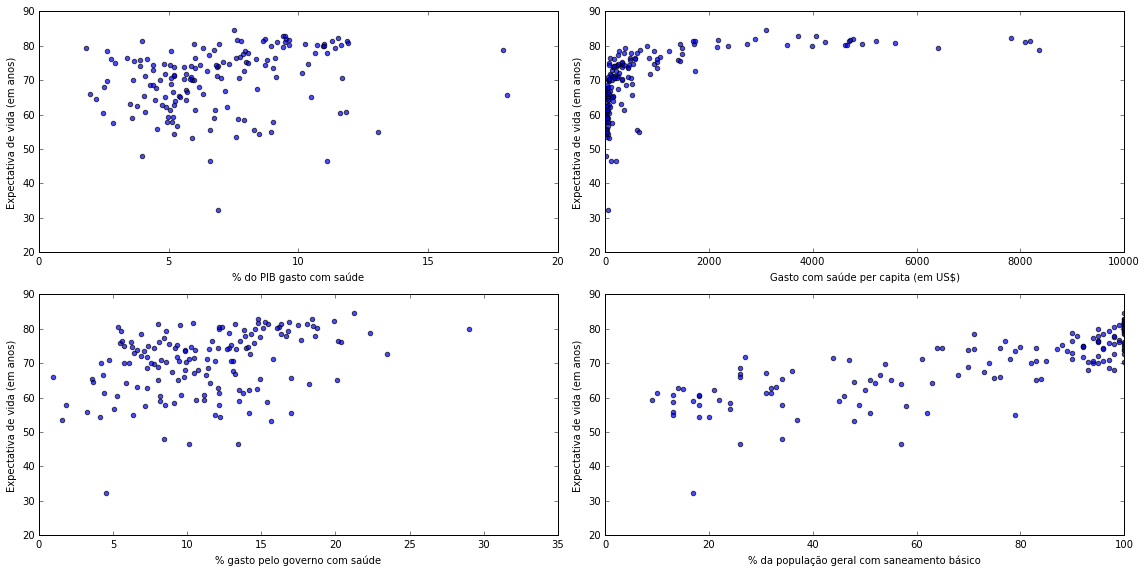

In [6]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(dados.PercSaudePIB, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("% do PIB gasto com saúde")
ax[0,0].set_ylabel("Expectativa de vida (em anos)")

ax[0,1].scatter(dados.GastoSaudePerCap, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Gasto com saúde per capita (em US$)")
ax[0,1].set_ylabel("Expectativa de vida (em anos)")
ax[0,1].set_xlim(0,10000)

ax[1,0].scatter(dados.PercSaudeGov, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("% gasto pelo governo com saúde")
ax[1,0].set_ylabel("Expectativa de vida (em anos)")
ax[1,0].set_xlim(0,35)

ax[1,1].scatter(dados.PropPopSanea, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("% da população geral com saneamento básico")
ax[1,1].set_ylabel("Expectativa de vida (em anos)")
ax[1,1].set_xlim(0,100)

plt.tight_layout(1)

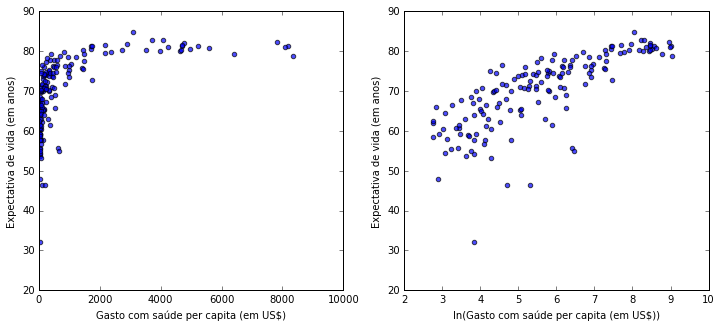

In [7]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.GastoSaudePerCap, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Gasto com saúde per capita (em US$)")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_xlim(0,10000)

ax[1].scatter(np.log(dados.GastoSaudePerCap), dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("ln(Gasto com saúde per capita (em US$))")
ax[1].set_ylabel("Expectativa de vida (em anos)")


In [8]:
dados.corr(method='pearson')

,ExpVida,PercSaudePIB,GastoSaudePerCap,PercSaudeGov,PropPopSanea,LNGastoSaudePerCap
ExpVida,1.000000,0.236452,0.553312,0.361530,0.802367,0.763843
PercSaudePIB,0.236452,1.000000,0.530450,0.566336,0.234869,0.487166
GastoSaudePerCap,0.553312,0.530450,1.000000,0.470394,0.470720,0.793091
PercSaudeGov,0.361530,0.566336,0.470394,1.000000,0.311793,0.486603
PropPopSanea,0.802367,0.234869,0.470720,0.311793,1.000000,0.772520
LNGastoSaudePerCap,0.763843,0.487166,0.793091,0.486603,0.772520,1.000000


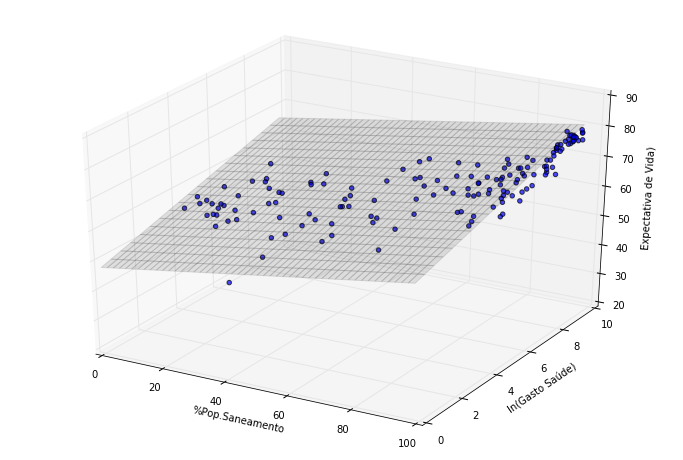

In [9]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='ExpVida ~ PropPopSanea + LNGastoSaudePerCap', data = dados)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 100, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'PropPopSanea': x_surf.ravel(), 'LNGastoSaudePerCap': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['PropPopSanea'], dados['LNGastoSaudePerCap'], dados['ExpVida'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlim(0,100)
ax.set_ylim(0,10)
ax.set_xlabel('%Pop.Saneamento')
ax.set_ylabel('ln(Gasto Saúde)')
ax.set_zlabel('Expectativa de Vida)')

In [10]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.ExpVida
X=dados.iloc[:,(4,5)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 17 Nov 2016   Prob (F-statistic):           1.10e-39
Time:                        20:37:39   Log-Likelihood:                -469.10
No. Observations:                 154   AIC:                             944.2
Df Residuals:                     151   BIC:                             953.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 47.8534      1.431     33.446      0.000        45.026    50.680
PropPopSanea           0.1595      0.021      7.441      0.000         0.117     0.202
LNGastoSaudePerCap     1.9383      0.384      5.048      0.000         1.180     2.697
==============================================================================
Omnibus:                       74.895   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.970
Skew:                          -1.806   Prob(JB):                     8.99e-70
Kurtosis:                       9.042   Cond. No.                         275.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(7.2080653130194259,
 0.20562041295222189,
 1.453477220804682,
 0.20858961163081446)